In [6]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
# Sample data
data = {'Transaction': ['T1', 'T2', 'T3', 'T4', 'T5'],
        'Items': [['A', 'B', 'C'],
                  ['A', 'C'],
                  ['B', 'C'],
                  ['A', 'B'],
                  ['B', 'C']]}

In [8]:
# Creating a DataFrame
df = pd.DataFrame(data)

In [9]:
df.head()

,Transaction,Items
0,T1,"[A, B, C]"
1,T2,"[A, C]"
2,T3,"[B, C]"
3,T4,"[A, B]"
4,T5,"[B, C]"


In [10]:
df.shape

(5, 2)

In [11]:
# Function to encode items
def encode_items(x):
    if x:
        return 1
    return 0

In [12]:
# Applying one-hot encoding and handling NaN values
basket_sets = df['Items'].apply(lambda x: pd.Series(x).apply(encode_items)).fillna(0)

In [13]:
# Initialize a dictionary to store frequent itemsets
frequent_itemsets_dict = {}

In [14]:
# Iterate over different support thresholds
for min_support in [0.2, 0.3, 0.4]:  # Adjust as needed
    # Applying Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)
    
    # Store frequent itemsets in the dictionary
    frequent_itemsets_dict[min_support] = frequent_itemsets

    # Displaying frequent itemsets
    print(f"\nFrequent Itemsets with Minimum Support = {min_support}:\n")
    print(frequent_itemsets)
    


Frequent Itemsets with Minimum Support = 0.2:

   support   itemsets
0      1.0        (0)
1      1.0        (1)
2      0.2        (2)
3      1.0     (0, 1)
4      0.2     (0, 2)
5      0.2     (1, 2)
6      0.2  (0, 1, 2)

Frequent Itemsets with Minimum Support = 0.3:

   support itemsets
0      1.0      (0)
1      1.0      (1)
2      1.0   (0, 1)

Frequent Itemsets with Minimum Support = 0.4:

   support itemsets
0      1.0      (0)
1      1.0      (1)
2      1.0   (0, 1)


C:\Users\urvis\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\urvis\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\urvis\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
# Extract the last set of frequent itemsets
last_frequent_itemsets = frequent_itemsets_dict[0.4]

In [16]:
# Displaying the last set of frequent itemsets
print("\nFrequent Itemsets (Last Set):\n")
for _, row in last_frequent_itemsets.iterrows():
    print(' '.join(map(str, row['itemsets'])))


Frequent Itemsets (Last Set):

0
1
0 1


In [17]:
# Generating association rules for the last set of frequent itemsets
rules_last_set = association_rules(last_frequent_itemsets, metric="confidence", min_threshold=0.7)

In [18]:
# Displaying association rules for the last set
print("\nStrongly Associated Rules from Last Set:")
print(rules_last_set)


Strongly Associated Rules from Last Set:
  antecedents consequents  antecedent support  consequent support  support  \
0         (0)         (1)                 1.0                 1.0      1.0   
1         (1)         (0)                 1.0                 1.0      1.0   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0   1.0       0.0         inf            0.0  
1         1.0   1.0       0.0         inf            0.0  


In [19]:
# Printing individual association rules with item names
for _, item in rules_last_set.iterrows():
    antecedents = ', '.join(map(str, item['antecedents']))
    consequents = ', '.join(map(str, item['consequents']))

    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {item['support']:.3f}")
    print(f"Confidence: {item['confidence']:.3f}")
    print(f"Lift: {item['lift']:.3f}")
    print("=====================================")

Rule: 0 -> 1
Support: 1.000
Confidence: 1.000
Lift: 1.000
Rule: 1 -> 0
Support: 1.000
Confidence: 1.000
Lift: 1.000


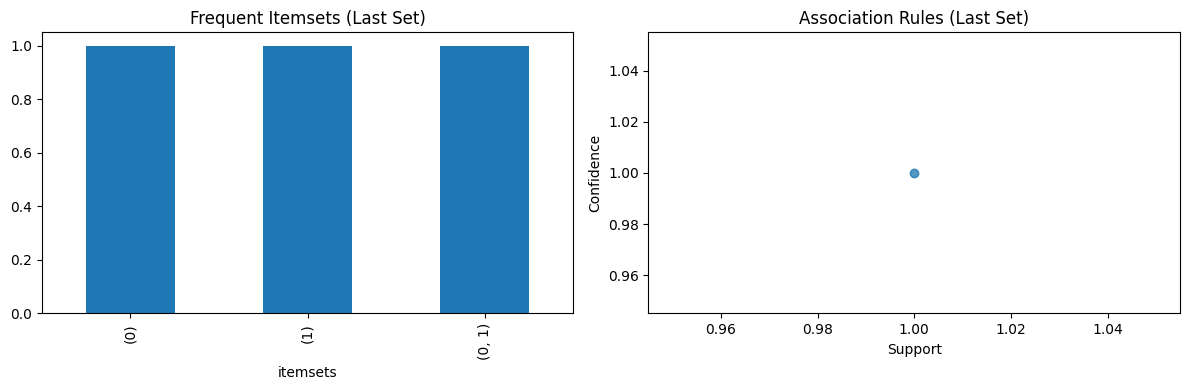

In [20]:
# Plotting results for the last set of frequent itemsets
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting frequent itemsets
last_frequent_itemsets.plot(ax=axes[0], kind='bar', x='itemsets', y='support', legend=False)
axes[0].set_title('Frequent Itemsets (Last Set)')

# Plotting association rules
axes[1].scatter(rules_last_set['support'], rules_last_set['confidence'], alpha=0.5)
axes[1].set_xlabel('Support')
axes[1].set_ylabel('Confidence')
axes[1].set_title('Association Rules (Last Set)')

plt.tight_layout()
plt.show()